In [1]:
#import stuff that needed
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#knobs
BATCH_SIZE = 32
EPOCHS = 20
IMG_SIZE = (224, 224)
IMG_SHAPE = (224, 224, 3)

In [4]:
import zipfile, os

local_zip = '/content/drive/MyDrive/Dataset/4-mini.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = '/tmp/4-mini'

NUM_OF_CLASS = len(os.listdir(base_dir))

In [6]:
train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'training'
)

test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'validation'
)

Found 397 images belonging to 4 classes.
Found 99 images belonging to 4 classes.


In [8]:
TRAIN_SIZE = train_generator.n
TEST_SIZE = test_generator.n

In [9]:
model = Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=IMG_SHAPE),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_OF_CLASS, activation='softmax')
])

In [10]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_generator,
    epochs = EPOCHS,
    steps_per_epoch = TRAIN_SIZE // BATCH_SIZE,
    validation_data = test_generator,
    validation_steps = TEST_SIZE // BATCH_SIZE
)

Epoch 1/20
12/12 [==============================] - 22s 511ms/step - loss: 1.4447 - accuracy: 0.3689 - val_loss: 0.8038 - val_accuracy: 0.6250
Epoch 2/20
12/12 [==============================] - 6s 497ms/step - loss: 0.8556 - accuracy: 0.6163 - val_loss: 0.8150 - val_accuracy: 0.6979
Epoch 3/20
12/12 [==============================] - 6s 511ms/step - loss: 0.7556 - accuracy: 0.6937 - val_loss: 0.9480 - val_accuracy: 0.5625
Epoch 4/20
12/12 [==============================] - 6s 496ms/step - loss: 0.6866 - accuracy: 0.7474 - val_loss: 0.8421 - val_accuracy: 0.5833
Epoch 5/20
12/12 [==============================] - 5s 492ms/step - loss: 0.6985 - accuracy: 0.7220 - val_loss: 0.5126 - val_accuracy: 0.8542
Epoch 6/20
12/12 [==============================] - 6s 513ms/step - loss: 0.4094 - accuracy: 0.8732 - val_loss: 0.4592 - val_accuracy: 0.8542
Epoch 7/20
12/12 [==============================] - 5s 494ms/step - loss: 0.4363 - accuracy: 0.8168 - val_loss: 0.7667 - val_accuracy: 0.7083
Epoch

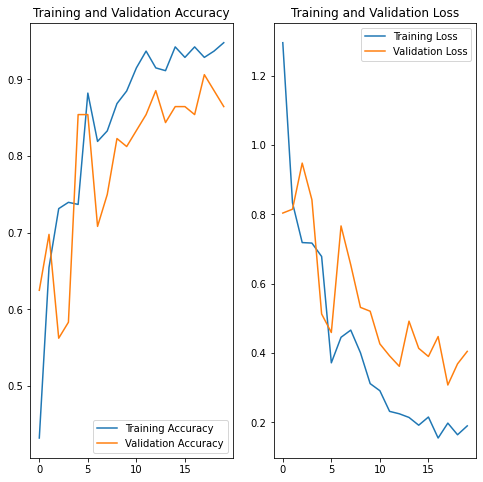

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving jer4.jpg to jer4 (5).jpg
jer4.jpg
Jeruk


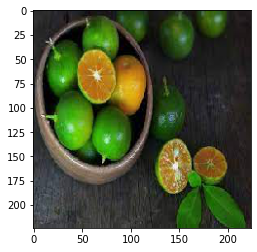

In [19]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMG_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Brokoli')
  elif classes[0][1]==1:
    print('Wortel')
  elif classes[0][2]==1:
    print('Apel')
  else :
    print('Jeruk')

In [20]:
export_dir = 'saved_model-fromscratch'

model.save(export_dir)

INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


In [21]:
!zip -r /content/saved_model-fromscratch.zip /content/saved_model-fromscratch

updating: content/saved_model-fromscratch/ (stored 0%)
updating: content/saved_model-fromscratch/assets/ (stored 0%)
updating: content/saved_model-fromscratch/keras_metadata.pb (deflated 86%)
updating: content/saved_model-fromscratch/saved_model.pb (deflated 90%)
updating: content/saved_model-fromscratch/variables/ (stored 0%)
updating: content/saved_model-fromscratch/variables/variables.data-00000-of-00001 (deflated 9%)
updating: content/saved_model-fromscratch/variables/variables.index (deflated 67%)


In [22]:
from google.colab import files
files.download("/content/saved_model-fromscratch.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>